In [1]:
%%html
<marquee style='width: 90%; color: blue;'><b>INSTITUTO INFNET | ESCOLA SUPERIOR DA
TECNOLOGIA DA INFORMAÇÃO</b></marquee>

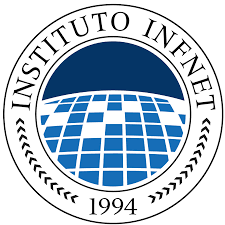

<h2>Pós-graduação MIT em Inteligência Artificial, Machine Learning & Deep Learning</h2>

<h3>Projeto da disciplina de algoritmos não-supervisionados para clusterização.</h3>

Bloco: Clusterização de Dados

Docente: Luiz Fernando Frias

Aluno: Winicius Botelho Faquieri 

---

* Instruções:

## [Infraestrutura](#infra)


* Você está rodando em Python 3.9+ ✔️


* Você está usando um ambiente virtual: Virtualenv ou **Anaconda** ✔️

    
* Todas as bibliotecas usadas nesse exercícios estão instaladas em um ambiente virtual específico ✔️


* Gere um arquivo de requerimentos (requirements.txt) com os pacotes necessários. É necessário se certificar que a versão do pacote está disponibilizada. ✔️


* Tire um printscreen do ambiente que será usado rodando em sua máquina. ✔️

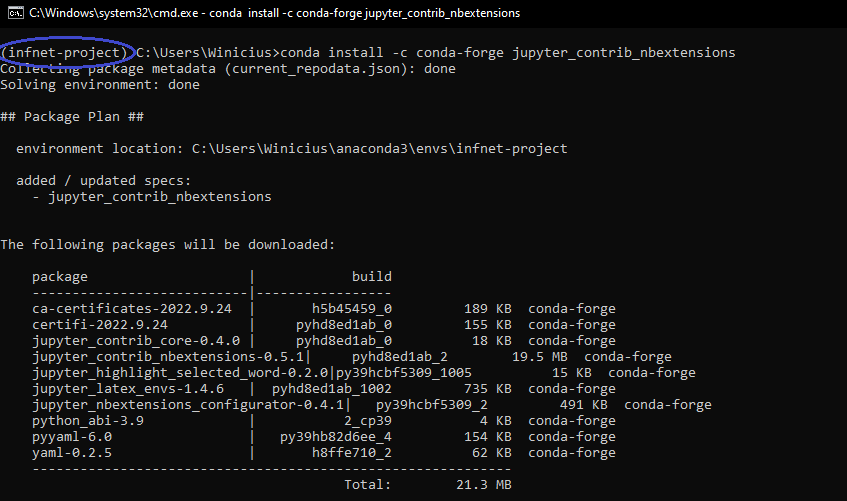

* Disponibilize os códigos gerados, assim como os artefatos acessórios (requirements.txt) e instruções em um repositório GIT público. (se isso não for feito, o diretório com esses arquivos deverá ser enviado compactado no moodle) ✔️
https://github.com/wfaquieri/unsupervised-infnet

---

## [Escolha de base de dados](#dataset)

*  ✔️ Baixe os dados disponibilizados na plataforma Kaggle sobre dados sócio-econômicos e de saúde que determinam o índice de desenvolvimento de um país. Esses dados estão disponibilizados através do link: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data


* ✔️ Quantos países existem no dataset? 167.


* ✔️ Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização? 

*Antes da etapa de clusterização devemos retirar variáveis que são altamente correlacionadas para evitar um possível problema de multicolinearidade. Além disso, devemos realizar o pré-processamento dos dados, removendo o potencial viés que o modelo pode ter em relação a features com magnitudes mais altas. Isso é importante, pois cada feature varia em faixas específicas e diferentes entre si. Essa diferença entre as variáveis pode fazer com que o modelo atribua um peso maior a algumas features do que outras.*


* ✔️ Realize o pré-processamento adequado dos dados.

---

## [Clusterização](#clusters)

Para os dados pré-processados da etapa anterior você irá:

1. Realizar o agrupamento dos países em 3 grupos distintos. Para tal, use:

    a. K-Médias ✔️    
    b. Clusterização Hierárquica ✔️


2. Para os resultados, do K-Médias:    
    a. Interprete cada um dos clusters obtidos citando:
        i. Qual a distribuição das dimensões em cada grupo ✔️
        ii. O país, de acordo com o algoritmo, melhor representa o seu agrupamento. Justifique. ✔️


3. Para os resultados da Clusterização Hierárquica, apresente o dendograma e interprete os resultados ✔️


4. Compare os dois resultados, aponte as semelhanças e diferenças e interprete. ✔️

---

## [Escolha de algoritmos](#algoritmos)

✔️ 1. Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência. 

*K-Means é um algoritmo baseado em distância que é usado para aprendizado não supervisionado que não suporta features categóricas. É o algoritmo mais preferido para lidar com Aprendizado Não Supervisionado que faz o trabalho de encontrar clusters nos dados, mas com uma abordagem matemática:*

*0. É necessário definir o número de clusters;*


*1. Seleciona k centróides aleatoriamente.*


*2. A distância entre os centroides e todos os pontos de dados é calculada.*


*3. Se o ponto de dados estiver mais próximo de um dos centróides, ele será rotulado como esse centróide e vice-versa.*


*4. Para os k clusters formados, o valor médio dos pontos de dados, agrupados com qualquer um dos centróides, é calculado e esses valores médios são então definidos como os novos clusters.*


*5. Este processo se repete até que ambos os centróides convergem para pontos fixos.*

---

✔️ 2. O algoritmo de K-médias converge até encontrar os centróides que melhor descrevem os clusters encontrados (até o deslocamento entre as interações dos centróides ser mínimo). Lembrando que o centróide é o baricentro do cluster em questão e não representa, em via de regra, um dado existente na base. Refaça o algoritmo apresentado na questão 1 a fim de garantir que o cluster seja representado pelo dado mais próximo ao seu baricentro em todas as iterações do algoritmo.

Obs: nesse novo algoritmo, o dado escolhido será chamado medóide.

1. Inicializar: selecionar aleatoriamente k dos n pontos de dados como os medoids.

2. Etapa de atribuição : associe cada ponto de dados ao medoid mais próximo.

3. Etapa de atualização : Para cada medoid m e cada ponto de dados o associado a m , troque m e o e calcule o custo total da configuração (ou seja, a dissimilaridade média de o para todos os pontos de dados associados a m ). 

4. Selecione o medoid o com o menor custo da configuração.

5. Repita alternando as etapas 2 e 3 até que não haja alteração nas atribuições.

PS - Diferentemente do K-Means, o K-Medoid utiliza a mediana dos clusters.

---

✔️ 3. O algoritmo de K-médias é sensível a outliers nos dados. Explique.

*Como o algoritmo K-Means trata de encontrar a **média** dos clusters, o algoritmo é influenciado por outliers. Todos os pontos precisam ser agrupados, mesmo quando não parecem fazer parte da distribuição dos dados de um determinado cluster*

---

✔️ 4. Por que o algoritmo de DBScan é mais robusto à presença de outliers?

*DBSCAN é um algoritmo de agrupamento baseado em densidade que é usado para problemas de aprendizagem não supervisionados. Cria os clusters de forma diferente do KMeans, agrupa os pontos próximos e marca como outliers os pontos isolados em região de baixa densidade. Estes pontos não fazem parte de nenhum cluster.*


---



In [2]:
# BIBLIOTECAS:

import session_info
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# scaling 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# import PCA 
from sklearn.decomposition import PCA

# kmeans clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

# multivariate linear regression
from sklearn import linear_model

# geo data
import geopandas as gpd
from geopandas import GeoDataFrame as gdf
import plotly.express as px
import mapclassify
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Informações da sessaõ
session_info.show()

> O que você vai encontrar nesse notebook?

--- 

1. Desafio - Problema de Negócio


2. Informações sobre o dataset


3. Análise Exploratória dos Dados


4. Feature Engineering
    * Matriz de Correlação de Pearson
    * Fator de inflação de Variância - VIF
    * Padronização dos dados: RobustScaler
    * Análise dos Componentes Principais - PCA
    

5. Clusterização
    * K-Means
    * Clusterização Hierárquica 
    
  
6. Conclusão



---

### Desafio

A HELP International conseguiu arrecadar cerca de 10 milhões de dólares. Agora o CEO da ONG precisa decidir como usar esse dinheiro de forma estratégica e eficaz. **O CEO tem que tomar a decisão de escolher os países que mais precisam de ajuda.**

Assim, o desafio como Cientista de Dados é categorizar os países usando alguns fatores socioeconômicos e de saúde que determinam o desenvolvimento geral do país. Por fim, sugerir os países nos quais o CEO precisa se concentrar mais.

> Quais países devem receber financiamento e por quê?

### Dataset 

- Dicionário de variáveis:

| features   | descrição                                                                                                            |
|------------|----------------------------------------------------------------------------------------------------------------------|
| country    |  nome   do país                                                                                                      |
| child_mort |  Morte de crianças menores de 5   anos por 1000 nascidos vivos                                                       |
| exports    |  Exportações de bens e serviços per   capita. Dado como % do PIB per capita                                          |
| health     |  Gasto total com saúde per capita.   Dado como % do PIB per capita                                                   |
| imports    |  Importações de bens e serviços per   capita. Dado como % do PIB per capita                                          |
| income     |  Renda líquida por pessoa                                                                                            |
| inflation  |  A medida da taxa de crescimento   anual do PIB Total                                                                |
| life_expec |  O número médio de anos que um   recém-nascido viveria se os padrões de mortalidade atuais permanecessem os   mesmos |
| total_fer  |  O número de filhos que nasceriam   de cada mulher se as taxas atuais de idade-fertilidade permanecerem as mesmas    |
| gdpp       |  O PIB per capita. Calculado como o   PIB total dividido pela população total                                        |

In [4]:
# dataset
df = pd.read_csv('data/Country-data.csv')
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [5]:
# Número de linhas e colunas
df.shape

(167, 10)

In [6]:
# Há valores duplicados?
format(len(df[df.duplicated()]))

'0'

In [7]:
# Algumas informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
df.describe().T

count          mean           std       min       25%      50%  \
child_mort  167.0     38.270060     40.328931    2.6000     8.250    19.30   
exports     167.0     41.108976     27.412010    0.1090    23.800    35.00   
health      167.0      6.815689      2.746837    1.8100     4.920     6.32   
imports     167.0     46.890215     24.209589    0.0659    30.200    43.30   
income      167.0  17144.688623  19278.067698  609.0000  3355.000  9960.00   
inflation   167.0      7.781832     10.570704   -4.2100     1.810     5.39   
life_expec  167.0     70.555689      8.893172   32.1000    65.300    73.10   
total_fer   167.0      2.947964      1.513848    1.1500     1.795     2.41   
gdpp        167.0  12964.155689  18328.704809  231.0000  1330.000  4660.00   

                 75%        max  
child_mort     62.10     208.00  
exports        51.35     200.00  
health          8.60      17.90  
imports        58.75     174.00  
income      22800.00  125000.00  
inflation      10.75     104.00  
life_expec     76.80      82.80  
total_fer       3.88       7.49  
gdpp        14050.00  105000.00

In [9]:
# Duas medidas que quantificam o formato da distribuição das variáveis: Kurtosis and Skewness 
kurt = df.kurtosis(axis=0)
print("A função kurtosis() da biblioteca pandas calcula a Curtose de Fisher que é obtida subtraindo a Curtose de Pearson por três. \nDiferentemente da Curtose de Pearson, na de Fisher a definição de uma distribuição normal tem uma curtose de 0:\n");
print(kurt);

A função kurtosis() da biblioteca pandas calcula a Curtose de Fisher que é obtida subtraindo a Curtose de Pearson por três. 
Diferentemente da Curtose de Pearson, na de Fisher a definição de uma distribuição normal tem uma curtose de 0:

child_mort     1.766882
exports       10.138666
health         0.694196
imports        6.755854
income         7.028657
inflation     41.742502
life_expec     1.151591
total_fer     -0.186779
gdpp           5.527891
dtype: float64


C:\Users\Winicius\AppData\Local\Temp\ipykernel_7392\3592051954.py:2: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  kurt = df.kurtosis(axis=0)


In [10]:
# Assimetria
skewValue = df.skew(axis=0)
print("A assimetria de uma distribuição normal é zero:");
print(skewValue)

A assimetria de uma distribuição normal é zero:
child_mort    1.450774
exports       2.445824
health        0.705746
imports       1.905276
income        2.231480
inflation     5.154049
life_expec   -0.970996
total_fer     0.967092
gdpp          2.218051
dtype: float64


C:\Users\Winicius\AppData\Local\Temp\ipykernel_7392\2293488857.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewValue = df.skew(axis=0)


Algumas conclusões da análise exploratória inicial dos dados:

- Amostra pequena;
- Não há dados faltantes;
- Não há valores duplicados;
- Existência de valores atípicos ou outliers;
- Distribuição assimétrica;

<AxesSubplot: title={'center': 'Taxa de Mortalidade Infantil: morte de crianças menores de 5 anos por 1000 nascidos vivos'}, xlabel='child_mort', ylabel='Count'>

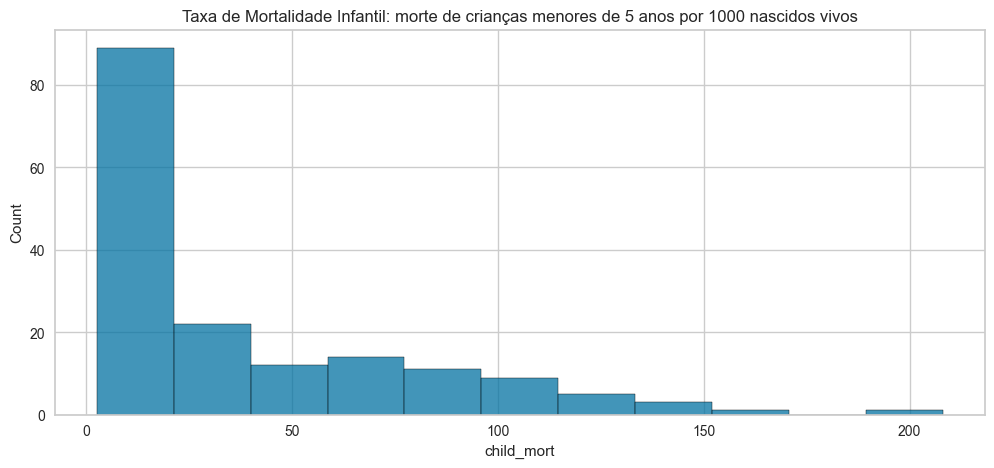

In [11]:
plt.figure(figsize=(12,5))
plt.title("Taxa de Mortalidade Infantil: morte de crianças menores de 5 anos por 1000 nascidos vivos")
sns.histplot(df["child_mort"])

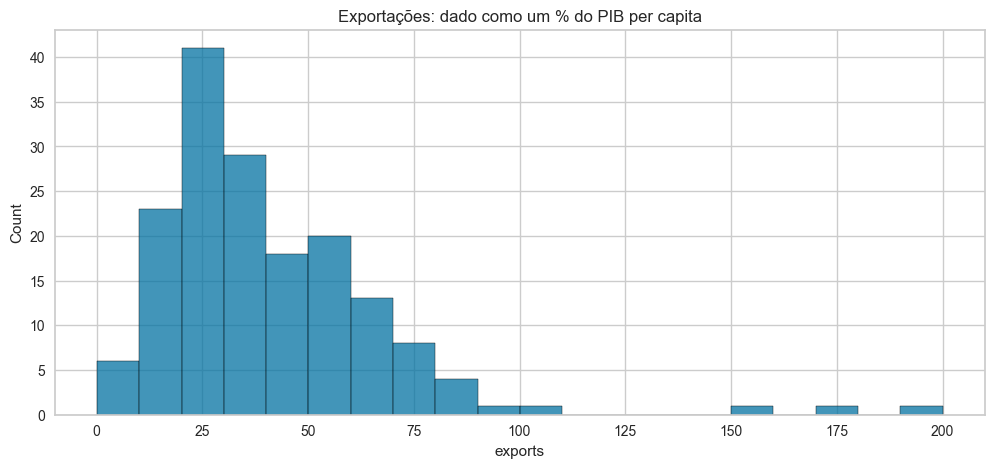

In [12]:
plt.figure(figsize=(12,5))
plt.title("Exportações: dado como um % do PIB per capita")
ax = sns.histplot(df["exports"])

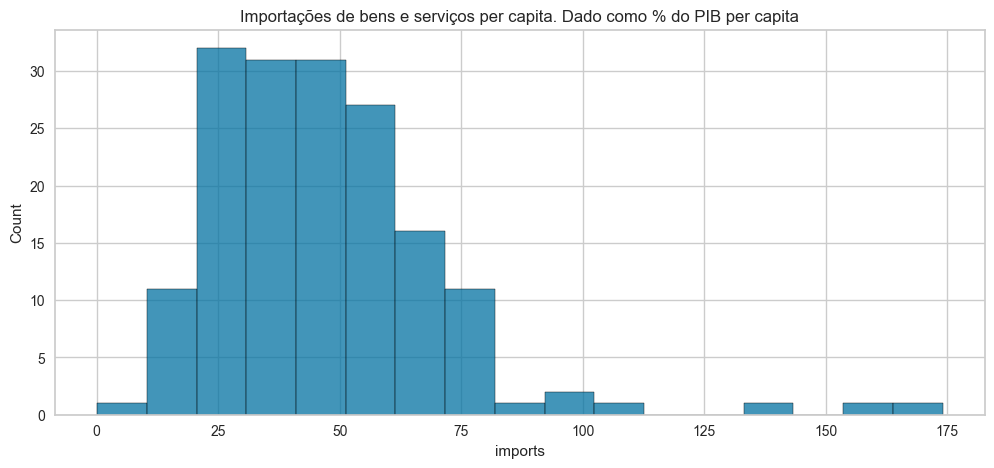

In [13]:
plt.figure(figsize=(12,5))
plt.title("Importações de bens e serviços per capita. Dado como % do PIB per capita")
ax = sns.histplot(df["imports"])

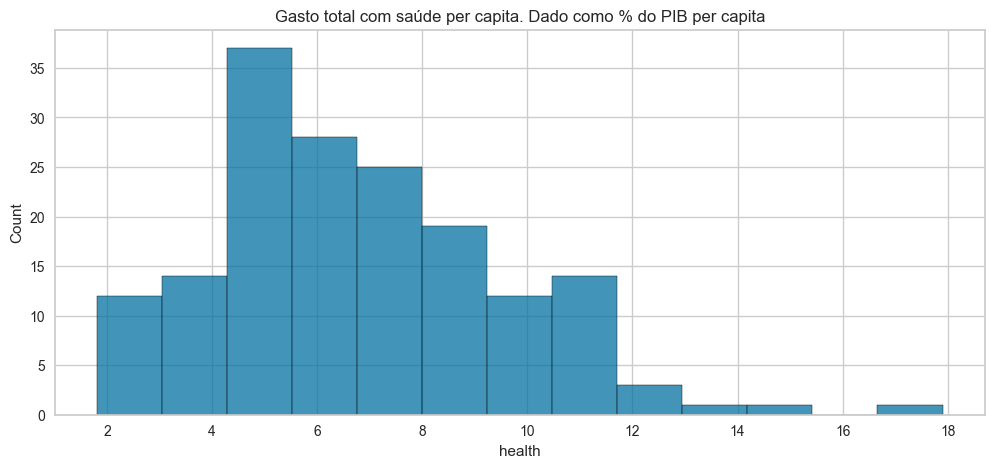

In [14]:
plt.figure(figsize=(12,5))
plt.title("Gasto total com saúde per capita. Dado como % do PIB per capita")
ax = sns.histplot(df["health"])

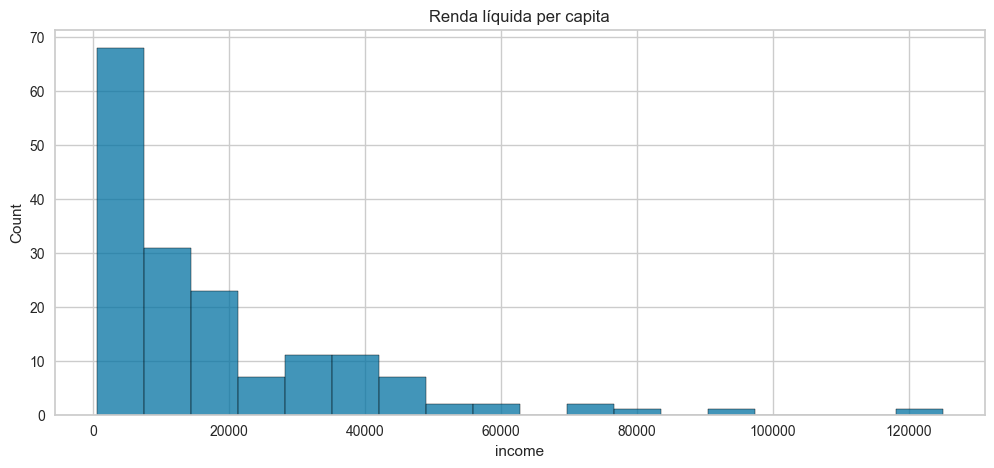

In [15]:
plt.figure(figsize=(12,5))
plt.title("Renda líquida per capita")
ax = sns.histplot(df["income"])

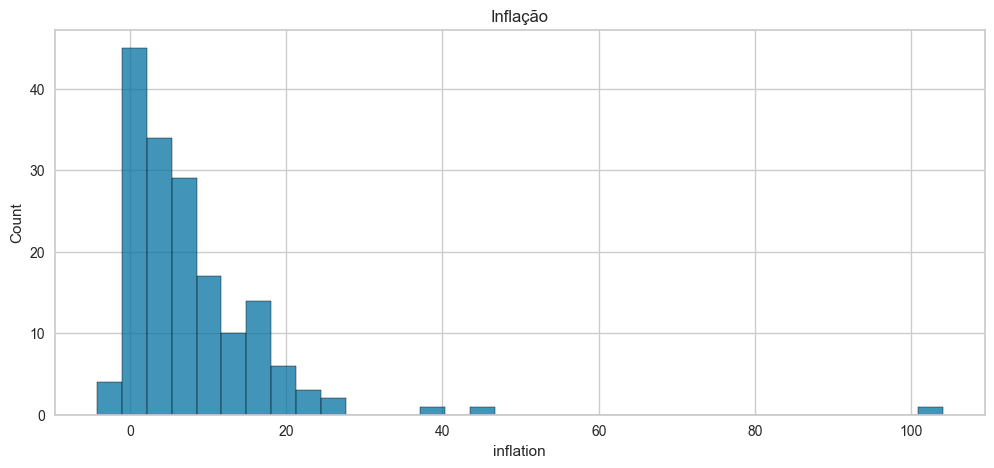

In [16]:
plt.figure(figsize=(12,5))
plt.title("Inflação")
ax = sns.histplot(df["inflation"])

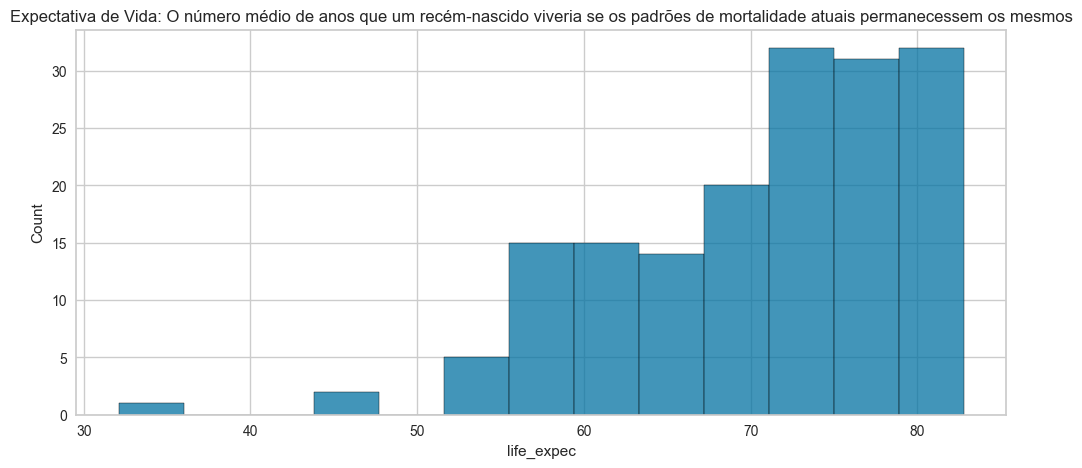

In [17]:
plt.figure(figsize=(12,5))
plt.title("Expectativa de Vida: O número médio de anos que um recém-nascido viveria se os padrões de mortalidade atuais permanecessem os mesmos")
ax = sns.histplot(df["life_expec"])

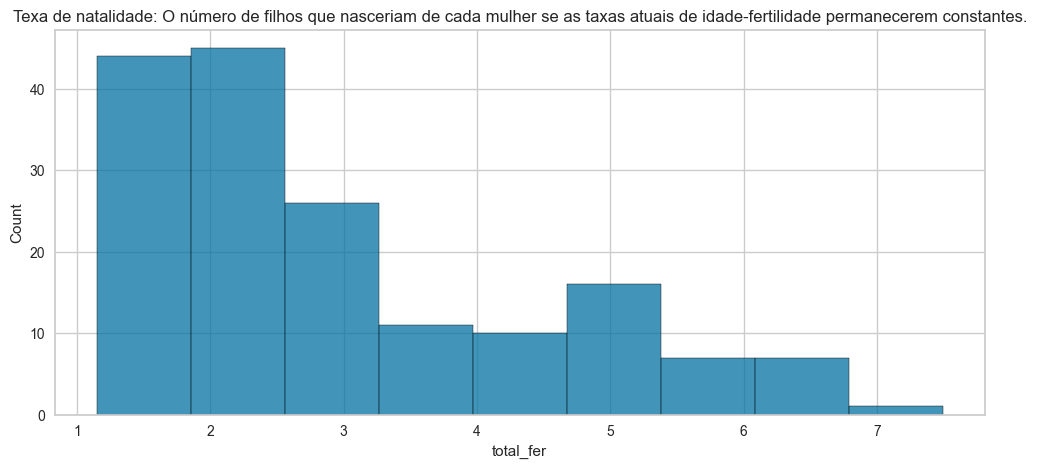

In [18]:
plt.figure(figsize=(12,5))
plt.title("Texa de natalidade: O número de filhos que nasceriam de cada mulher se as taxas atuais de idade-fertilidade permanecerem constantes.")
ax = sns.histplot(df["total_fer"])

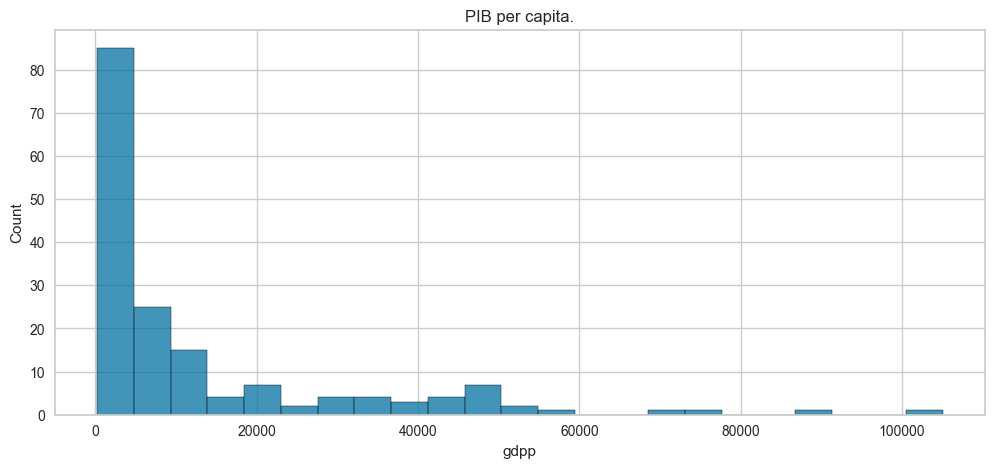

In [19]:
plt.figure(figsize=(12,5))
plt.title("PIB per capita.")
ax = sns.histplot(df["gdpp"])

> Observando a distribuição dos dados, é possível verificar a presença de valores discrepantes para várias features. A princípio, optou-se por manter os outliers nessa análise, pois podem apontar, justamente, países que estão em estado crítico e precisam de ajuda. 

### Matriz de Correlação e Multicolineridade

C:\Users\Winicius\AppData\Local\Temp\ipykernel_7392\1444474819.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson', min_periods=1),annot=True)


<AxesSubplot: >

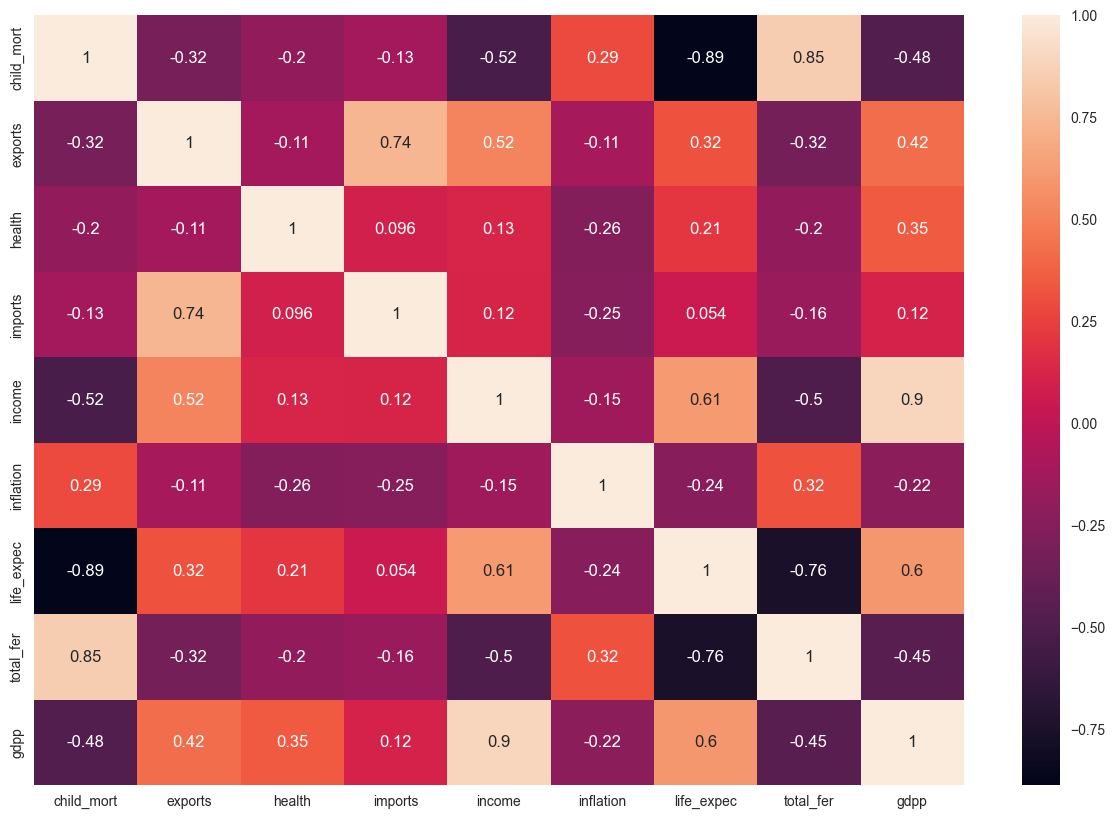

In [20]:
# pearson
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(method='pearson', min_periods=1),annot=True)

> Através da matriz de correlação e do mapa de calor, identificou-se variáveis altamente correlacionadas.

In [21]:
corr_matrix = df.corr()

# Obtendo o triangulo superior da matriz simétrica
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Identificando variáveis com uma correlação maior do que 0.80
features_to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.8)]

# potenciais variáveis para dropar
features_to_drop

C:\Users\Winicius\AppData\Local\Temp\ipykernel_7392\3397678023.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()
C:\Users\Winicius\AppData\Local\Temp\ipykernel_7392\3397678023.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


['life_expec', 'total_fer', 'gdpp']

Identificamos 03 variáveis com correlação maior do que 0.80. Mais precisamente, maiores do que 0.84, são elas:
- life_expect, devido à alta correlação com a mortalidade infantil
- total_fer, devido à alta correlação com a mortalidade infantil
- income, devido à alta correlação com o PIB

Para ter certeza se devemos ou não remover essas 03 features, vamos calcular o fator de inflação de variância (VIF). Um VIF entre 5 e 10 indica alta correlação, o que pode ser problemático.

* VIF

In [22]:
def compute_vif(features_to_drop):
    
    X = df[features_to_drop]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

# calculando o VIF para todas as features com alta correlação 
compute_vif(features_to_drop).sort_values('VIF', ascending=False)

C:\Users\Winicius\AppData\Local\Temp\ipykernel_7392\1502487744.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


Variable       VIF
0  life_expec  2.943387
1   total_fer  2.374929
2        gdpp  1.562778

> Após o cálculo do VIF para todas as variáveis que apresentaram alta correlação, optamos pela não remoção das variáveis, uma vez que os fatores calculados ficaram abaixo de 5.

### Pré-processamento dos dados

Normalização: reescala o centro para zero com desvio-padrao igual a 1.

Rescaling: reescala para o intervalo 0 e 1 (distribuições não Gaussianas):
- Min-Max Scaler: utiliza o range
- Robust Scaler: utiliza o IQR

A padronização de um conjunto de dados é um requisito comum para muitos estimadores de aprendizado de máquina. Normalmente, isso é feito removendo a média e dimensionando para a variância da unidade. No entanto, os outliers muitas vezes podem influenciar a média/variância da amostra de forma negativa. Nesses casos, a mediana e o intervalo interquartil costumam dar melhores resultados.

> Devido a presença de outliers, optou-se por utilizar o método Robust Scaler. Este Scaler remove a mediana e dimensiona os dados de acordo com o intervalo quantil (o padrão é IQR: intervalo interquartil). O IQR é o intervalo entre o 1º quartil (25º quantil) e o 3º quartil (75º quantil).

In [23]:
# Selecionando apenas as variáveis numéricas
num_attributes = df.select_dtypes( include=['int64', 'float64'] )
num_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


In [24]:
scaler = RobustScaler()

rescaled_dataset_robust = scaler.fit_transform(num_attributes)
rescaled_dataset_robust

array([[ 1.31662024, -0.90744102,  0.3423913 , ..., -1.46956522,
         1.63549161, -0.32287736],
       [-0.05013928, -0.25408348,  0.0625    , ...,  0.27826087,
        -0.36450839, -0.04481132],
       [ 0.14856082,  0.12341198, -0.58423913, ...,  0.29565217,
         0.23021583, -0.01572327],
       ...,
       [ 0.07428041,  1.3430127 ,  0.14130435, ...,  0.        ,
        -0.2206235 , -0.26336478],
       [ 0.68709378, -0.1814882 , -0.30978261, ..., -0.48695652,
         1.08393285, -0.26336478],
       [ 1.18477252,  0.07259528, -0.11684783, ..., -1.83478261,
         1.43405276, -0.25157233]])

In [25]:
num_att = df.drop(['country'], axis =1)
columns = num_att.columns

df_robust = pd.DataFrame(data= rescaled_dataset_robust , columns = columns)
df_robust

child_mort   exports    health   imports    income  inflation  \
0      1.316620 -0.907441  0.342391  0.056042 -0.429416   0.453020   
1     -0.050139 -0.254083  0.062500  0.185639 -0.001543  -0.100671   
2      0.148561  0.123412 -0.584239 -0.416813  0.151196   1.197987   
3      1.851439  0.990926 -0.942935 -0.014011 -0.208794   1.902685   
4     -0.167131  0.381125 -0.078804  0.546410  0.470044  -0.441834   
..          ...       ...       ...       ...       ...        ...   
162    0.183844  0.421053 -0.290761  0.329247 -0.360504  -0.309843   
163   -0.040854 -0.235935 -0.383152 -0.900175  0.336333   4.531320   
164    0.074280  1.343013  0.141304  1.292469 -0.281306   0.750559   
165    0.687094 -0.181488 -0.309783 -0.311734 -0.281821   2.036913   
166    1.184773  0.072595 -0.116848 -0.434326 -0.343533   0.963087   

     life_expec  total_fer      gdpp  
0     -1.469565   1.635492 -0.322877  
1      0.278261  -0.364508 -0.044811  
2      0.295652   0.230216 -0.015723  
3     -1.130435   1.798561 -0.088836  
4      0.321739  -0.134293  0.592767  
..          ...        ...       ...  
162   -0.878261   0.522782 -0.132862  
163    0.200000   0.028777  0.694969  
164    0.000000  -0.220624 -0.263365  
165   -0.486957   1.083933 -0.263365  
166   -1.834783   1.434053 -0.251572  

[167 rows x 9 columns]

In [26]:
df_robust.describe().T

count      mean       std       min       25%  50%       75%  \
child_mort  167.0  0.352276  0.748912 -0.310121 -0.205200  0.0  0.794800   
exports     167.0  0.221741  0.994991 -1.266461 -0.406534  0.0  0.593466   
health      167.0  0.134698  0.746423 -1.225543 -0.380435  0.0  0.619565   
imports     167.0  0.125752  0.847972 -1.514329 -0.458844  0.0  0.541156   
income      167.0  0.369488  0.991415 -0.480895 -0.339676  0.0  0.660324   
inflation   167.0  0.267543  1.182405 -1.073826 -0.400447  0.0  0.599553   
life_expec  167.0 -0.221244  0.773319 -3.565217 -0.678261  0.0  0.321739   
total_fer   167.0  0.258016  0.726066 -0.604317 -0.294964  0.0  0.705036   
gdpp        167.0  0.652842  1.440936 -0.348192 -0.261792  0.0  0.738208   

                  max  
child_mort   3.504178  
exports      5.989111  
health       3.146739  
imports      4.577933  
income       5.916174  
inflation   11.030201  
life_expec   0.843478  
total_fer    2.436451  
gdpp         7.888365

Text(0, 0.5, 'Child Mortality')

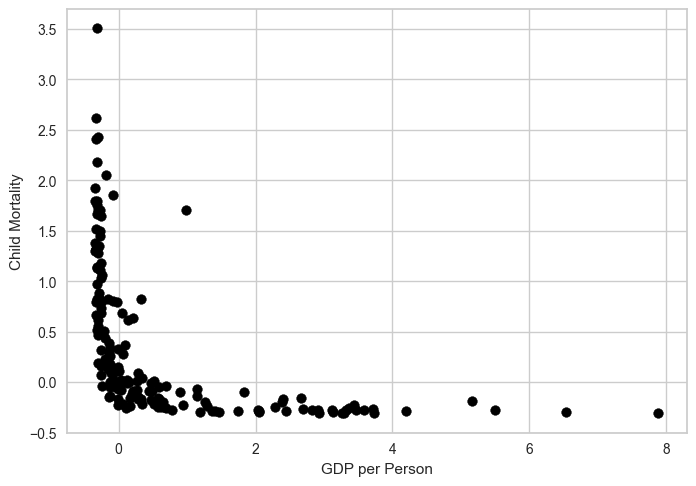

In [27]:
plt.scatter(df_robust['gdpp'], df_robust['child_mort'],color = 'black')
plt.scatter

plt.xlabel('GDP per Person')
plt.ylabel('Child Mortality')

### PCA: Análise de Componentes Principais

> Qual é a representação mais compacta das amostras?

Técnica de redução de dimensionalidade, que remove features de "ruído" ou menos informativas... que causam problemas para tarefas de previsão.

Premissas: (i). Considera que features com baixa variância são "ruídos"; (ii). Assume que features com alta variância são mais informativas.

    - Step 1. "descorrelação": as features do PCA são **não** linearmente correlacionadas!
    - Step 2. Redução de dimensionalidade
    
Ressalvas: A ideia de dimensão intrínseca, isto é, do número de features PCA com variância significante é uma idealização. Nem sempre há a resposta correta! 

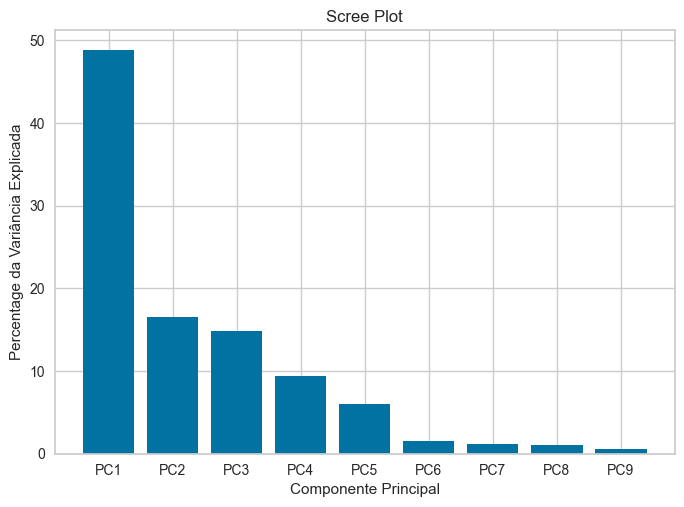

Text(0, 0.5, 'PC2 - 16.5%')

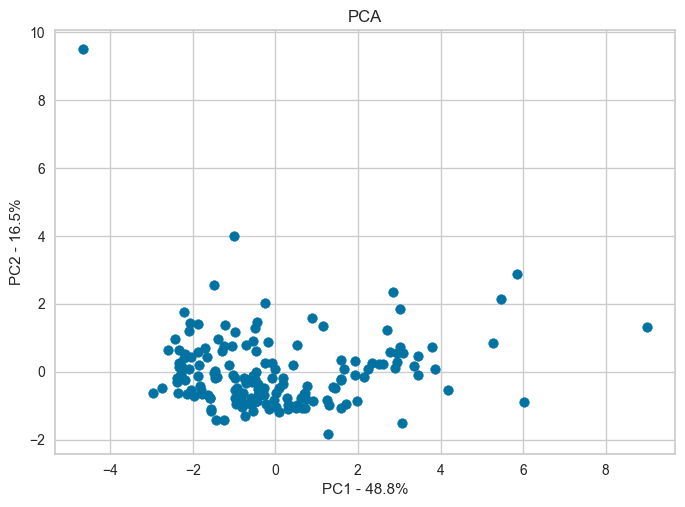

In [28]:
# fit and transform
pca = PCA()
pca.fit(df_robust)
pca_data_robust = pca.transform(df_robust)

# variação percentual 
per_var = np.round(pca.explained_variance_ratio_*100, decimals =1)
labels = ['PC' + str(x) for x in range (1, len(per_var)+1)]

# Plotar a porcentagem de variância explicada por componente principal
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label = labels)
plt.ylabel('Percentage da Variância Explicada')
plt.xlabel('Componente Principal')
plt.title('Scree Plot')
plt.show()

# Visualizando a transformação do PCA
pca_df_robust = pd.DataFrame(pca_data_robust, columns = labels)
plt.scatter(pca_df_robust.PC1, pca_df_robust.PC2)
plt.title('PCA')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

In [29]:
print(pca.components_)

[[-0.26061336  0.2904018   0.11566358  0.12890747  0.44016459 -0.22683049
   0.29095578 -0.24274147  0.65496309]
 [ 0.07227785 -0.04714366 -0.11104361 -0.29372587  0.24578561  0.85898068
   0.00911358  0.10025507  0.29249838]
 [ 0.10178039  0.69001004 -0.2523583   0.58202921  0.00590098  0.24236481
  -0.13644064  0.08006408 -0.16517371]
 [ 0.53293158 -0.03613139  0.22235101  0.07769066  0.10065492 -0.21150345
  -0.45381002  0.47853715  0.41157768]
 [ 0.09787774  0.06118614 -0.83083889 -0.34620012  0.25759935 -0.31488705
  -0.05748124  0.08778621  0.00257575]
 [ 0.13384811 -0.11156179  0.03400177  0.03675556  0.29088219  0.03728626
  -0.60091569 -0.71533303 -0.09125699]
 [-0.036821   -0.51500895 -0.41040738  0.53601422 -0.33182315  0.08115256
   0.01231988 -0.1088275   0.38597537]
 [-0.14036838 -0.3902519   0.03246044  0.37227748  0.68406289  0.00892096
   0.09339442  0.29993998 -0.3487805 ]
 [ 0.76415105 -0.04800426  0.01514241  0.07215865  0.08160768 -0.00403242
   0.56340398 -0.27276

Text(0, 0.5, 'PC4 - 9.4%')

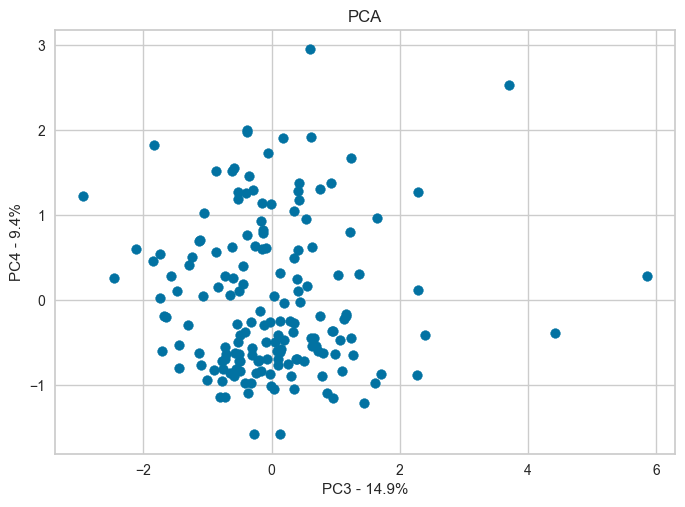

In [30]:
plt.scatter(pca_df_robust.PC3, pca_df_robust.PC4)
plt.title('PCA')
plt.xlabel('PC3 - {0}%'.format(per_var[2]))
plt.ylabel('PC4 - {0}%'.format(per_var[3]))

In [31]:
df2 = pca_df_robust.drop(['PC5','PC6','PC7','PC8','PC9'], axis = 1)
df2

PC1       PC2       PC3       PC4
0   -2.294559 -0.075365 -0.291972  1.299940
1   -0.274220 -0.685631 -0.410398 -0.979856
2   -0.716441  0.781060  0.038956 -1.048829
3   -2.059689  1.424454  1.636721  0.961193
4    0.630218 -0.781486  0.088919 -0.596073
..        ...       ...       ...       ...
162 -0.881589 -0.918743  0.442566 -0.025631
163 -0.998549  3.999539  0.128157 -1.576492
164 -0.266312 -0.475395  1.618841 -0.970759
165 -1.878068  1.393231  0.292088 -0.240876
166 -2.180481  0.520512  0.347382  1.053509

[167 rows x 4 columns]

In [32]:
# Somatório dos 04 componentes principais
round(48.8+16.5+14.9+9.4,0)

90.0

> Através da análise dos componentes principais, pode-se observar que apenas 4 componentes explicam cerca de 90% da distribuição dos dados originais. Estamos considerando, assim, que todas as outras features restantes são ruídos e, portanto, podem ser descartadas sem prejuízo!

### Modelo: K-Means 

**K-Means Clustering** é um algoritmo baseado em distância que é usado para aprendizado não supervisionado que não suporta features categóricas. É o algoritmo mais preferido para lidar com Aprendizado Não Supervisionado que faz o trabalho de encontrar clusters nos dados, mas com uma abordagem matemática:

1. Seleciona 2 (suponha k = 2) centróides aleatoriamente.

2. A distância entre os centroides e todos os pontos de dados é calculada.

3. Se o ponto de dados estiver mais próximo de um dos centróides, ele será rotulado como esse centróide e vice-versa.

4. Para os 2 clusters formados, o valor médio dos pontos de dados, agrupados com qualquer um dos centróides, é calculado e esses valores médios são então definidos como os novos clusters.

5. Este processo se repete até que ambos os centróides convergem para pontos fixos.

**hiperparâmetro k**: Define o número de clusters ou grupos em que os dados devem ser divididos. Para a seleção dos valores de k, usamos 2 testes estatísticos:

- **Método do cotovelo**: É um método que traça a soma do erro ao quadrado para um intervalo de valores de k. Se este gráfico se parece com um braço, então k é o valor que se assemelha a um cotovelo selecionado. A partir deste valor do cotovelo, a soma dos valores quadrados (inércia) começa a diminuir de forma linear e, portanto, é considerada um valor ótimo.

- **Método da silhueta**: é um método que avalia a qualidade dos clusters em termos de quão bem os pontos de dados são agrupados com outros pontos de dados semelhantes entre si. Essa pontuação é calculada usando a fórmula da distância e o valor de k com a pontuação mais alta é selecionado para modelagem.

* Rodando o modelo para as 2 versões do dataset:
    - df_robust: dataset padronizado (Robust Scaler);
    - df2: dataset padronizado (Robust Scaler) + 04 componentes principais.

#### A Curva de Cotovelo (*Elbow Curve*)

> Qual é o número ótimo de clusters? 

* O Método do Cotovelo ajuda a visualizar o momento onde a inércia começa a diminuir mais lentamente. Um bom cluster tem agrupamentos próximos (uma inércia menor)... mas não muitos clusters!

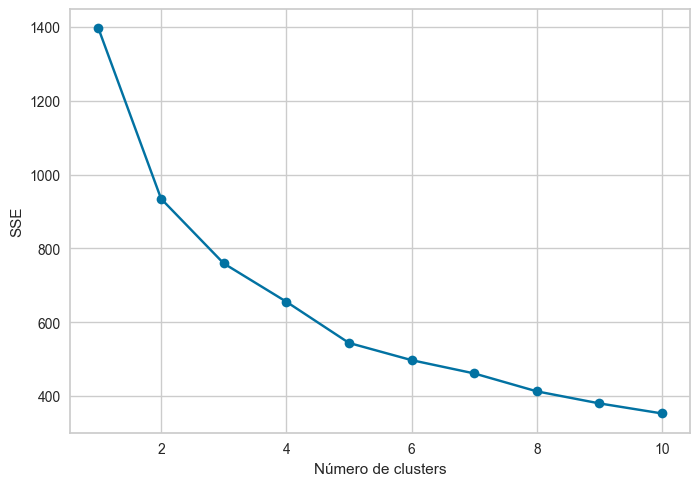

In [33]:
# Calculando a Soma dos Erros Quadrados (SSE) para df_robust
sse = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df_robust)
    sse.append(km.inertia_)

# plot
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.show()

> O número ótimo de clusters é algo entre 2 e 3; É posível observar que a partir de 03 clusters, as distâncias dos erros quadráticos praticamente se estabiliza. Neste ponto que seria o “cotovelo”, ou seja, a partir desse ponto não existe uma discrepância tão significativa em termos de variância.

In [34]:
sse

[1395.9866536620825,
 934.6155710356917,
 759.4328450432262,
 655.6327662204764,
 543.9764611233808,
 497.34567354923337,
 461.36544395501915,
 412.7900059444983,
 380.1337418232931,
 352.8765674432272]

In [35]:
km.inertia_

352.8765674432272

* Método da Silhueta

In [36]:
# calculate Silhoutte Score - stardardised
score = silhouette_score(df_robust, km.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.184


> Um valor próximo de 0 representa clusters sobrepostos com amostras muito próximas ao limite de decisão dos clusters vizinhos.

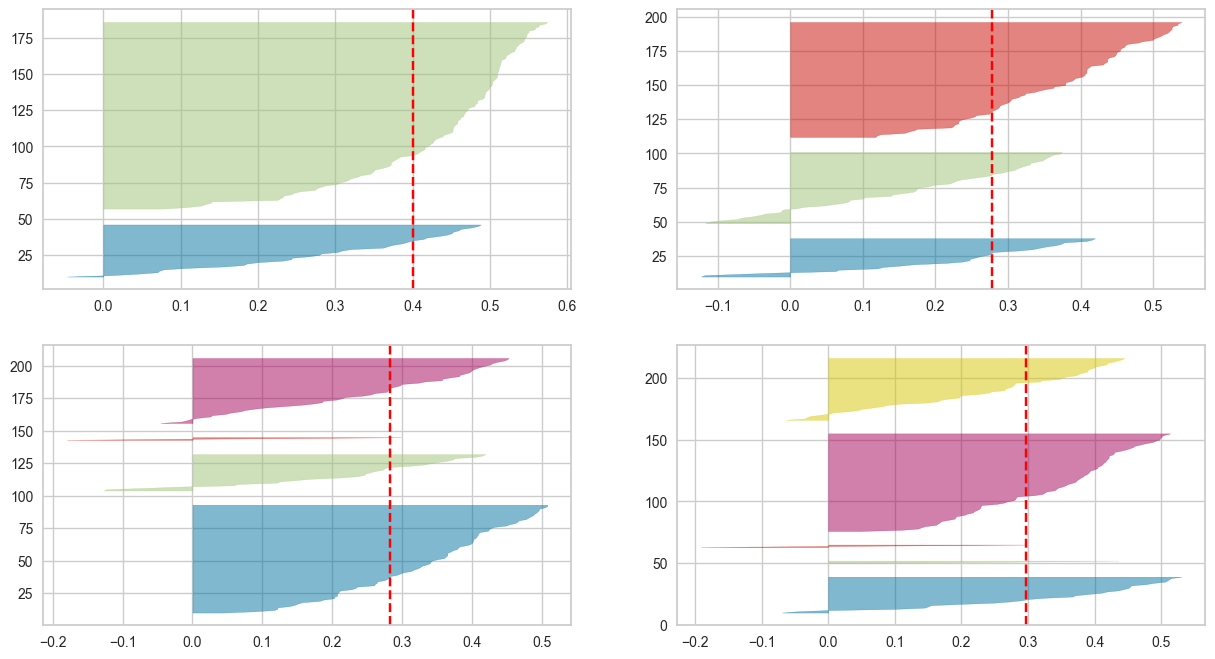

In [37]:
fig,ax = plt.subplots(2,2, figsize = (15,8))
for i in [2,3,4,5]:

    # crie uma instância kmeans para diferentes números de clusters
    km = KMeans(n_clusters=i, init= 'random', n_init =10, max_iter = 300, random_state = 0)
    q, mod = divmod(i,2)
    
    # plot
    visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_robust)

> As pontuações da silhueta estão muito próximas de 0, indicando que os clusters estão sobrepostos. Um aumento nos clusters (para 5, por exemplo) mostra que existem valores negativos na escala, o que significa que este número de clusters pode ter amostras que foram atribuídas ao cluster errado.

* Dos resultados dos 2 métodos, optamos por:

    k = 3

In [38]:
# KMEANS CLUSTERING 

km = KMeans(
    n_clusters = 3,  # numero de clusters/centroids
    init = 'random', # ‘random’: escolha n_clusters observações (linhas) aleatoriamente dos dados para os centróides iniciais
    n_init = 10,     # Este é o número de vezes que o algoritmo k-means será executado com diferentes sementes de centroides
    max_iter = 300,  # Este é o número máximo de iterações do algoritmo k-means para uma única execução.
    tol = 1e-4,      # Default.
    random_state = 0 # Determina a geração de números aleatórios para inicialização do centroide. Use um int para tornar a aleatoriedade determinística
)

# method to compute the clusters and assign the labels
y_predicted_robust = km.fit_predict(df_robust) 

df_robust['cluster'] = y_predicted_robust
df_robust.head()

print('A inércia mede a qualidade do agrupamento. Por outras palavras, mede a dispersão dos clusters (menor é melhor!). A dispersão é a distância de cada amostra ao centróide de seu cluster ou grupo. \n\nk-means tenta minimizar a inércia ao escolher o número de clusters.\n')
print('Inercia de',round(km.inertia_,0))

A inércia mede a qualidade do agrupamento. Por outras palavras, mede a dispersão dos clusters (menor é melhor!). A dispersão é a distância de cada amostra ao centróide de seu cluster ou grupo. 

k-means tenta minimizar a inércia ao escolher o número de clusters.

Inercia de 759.0


### Análise dos Clusters

* Visualizar os clusters para cada feature.

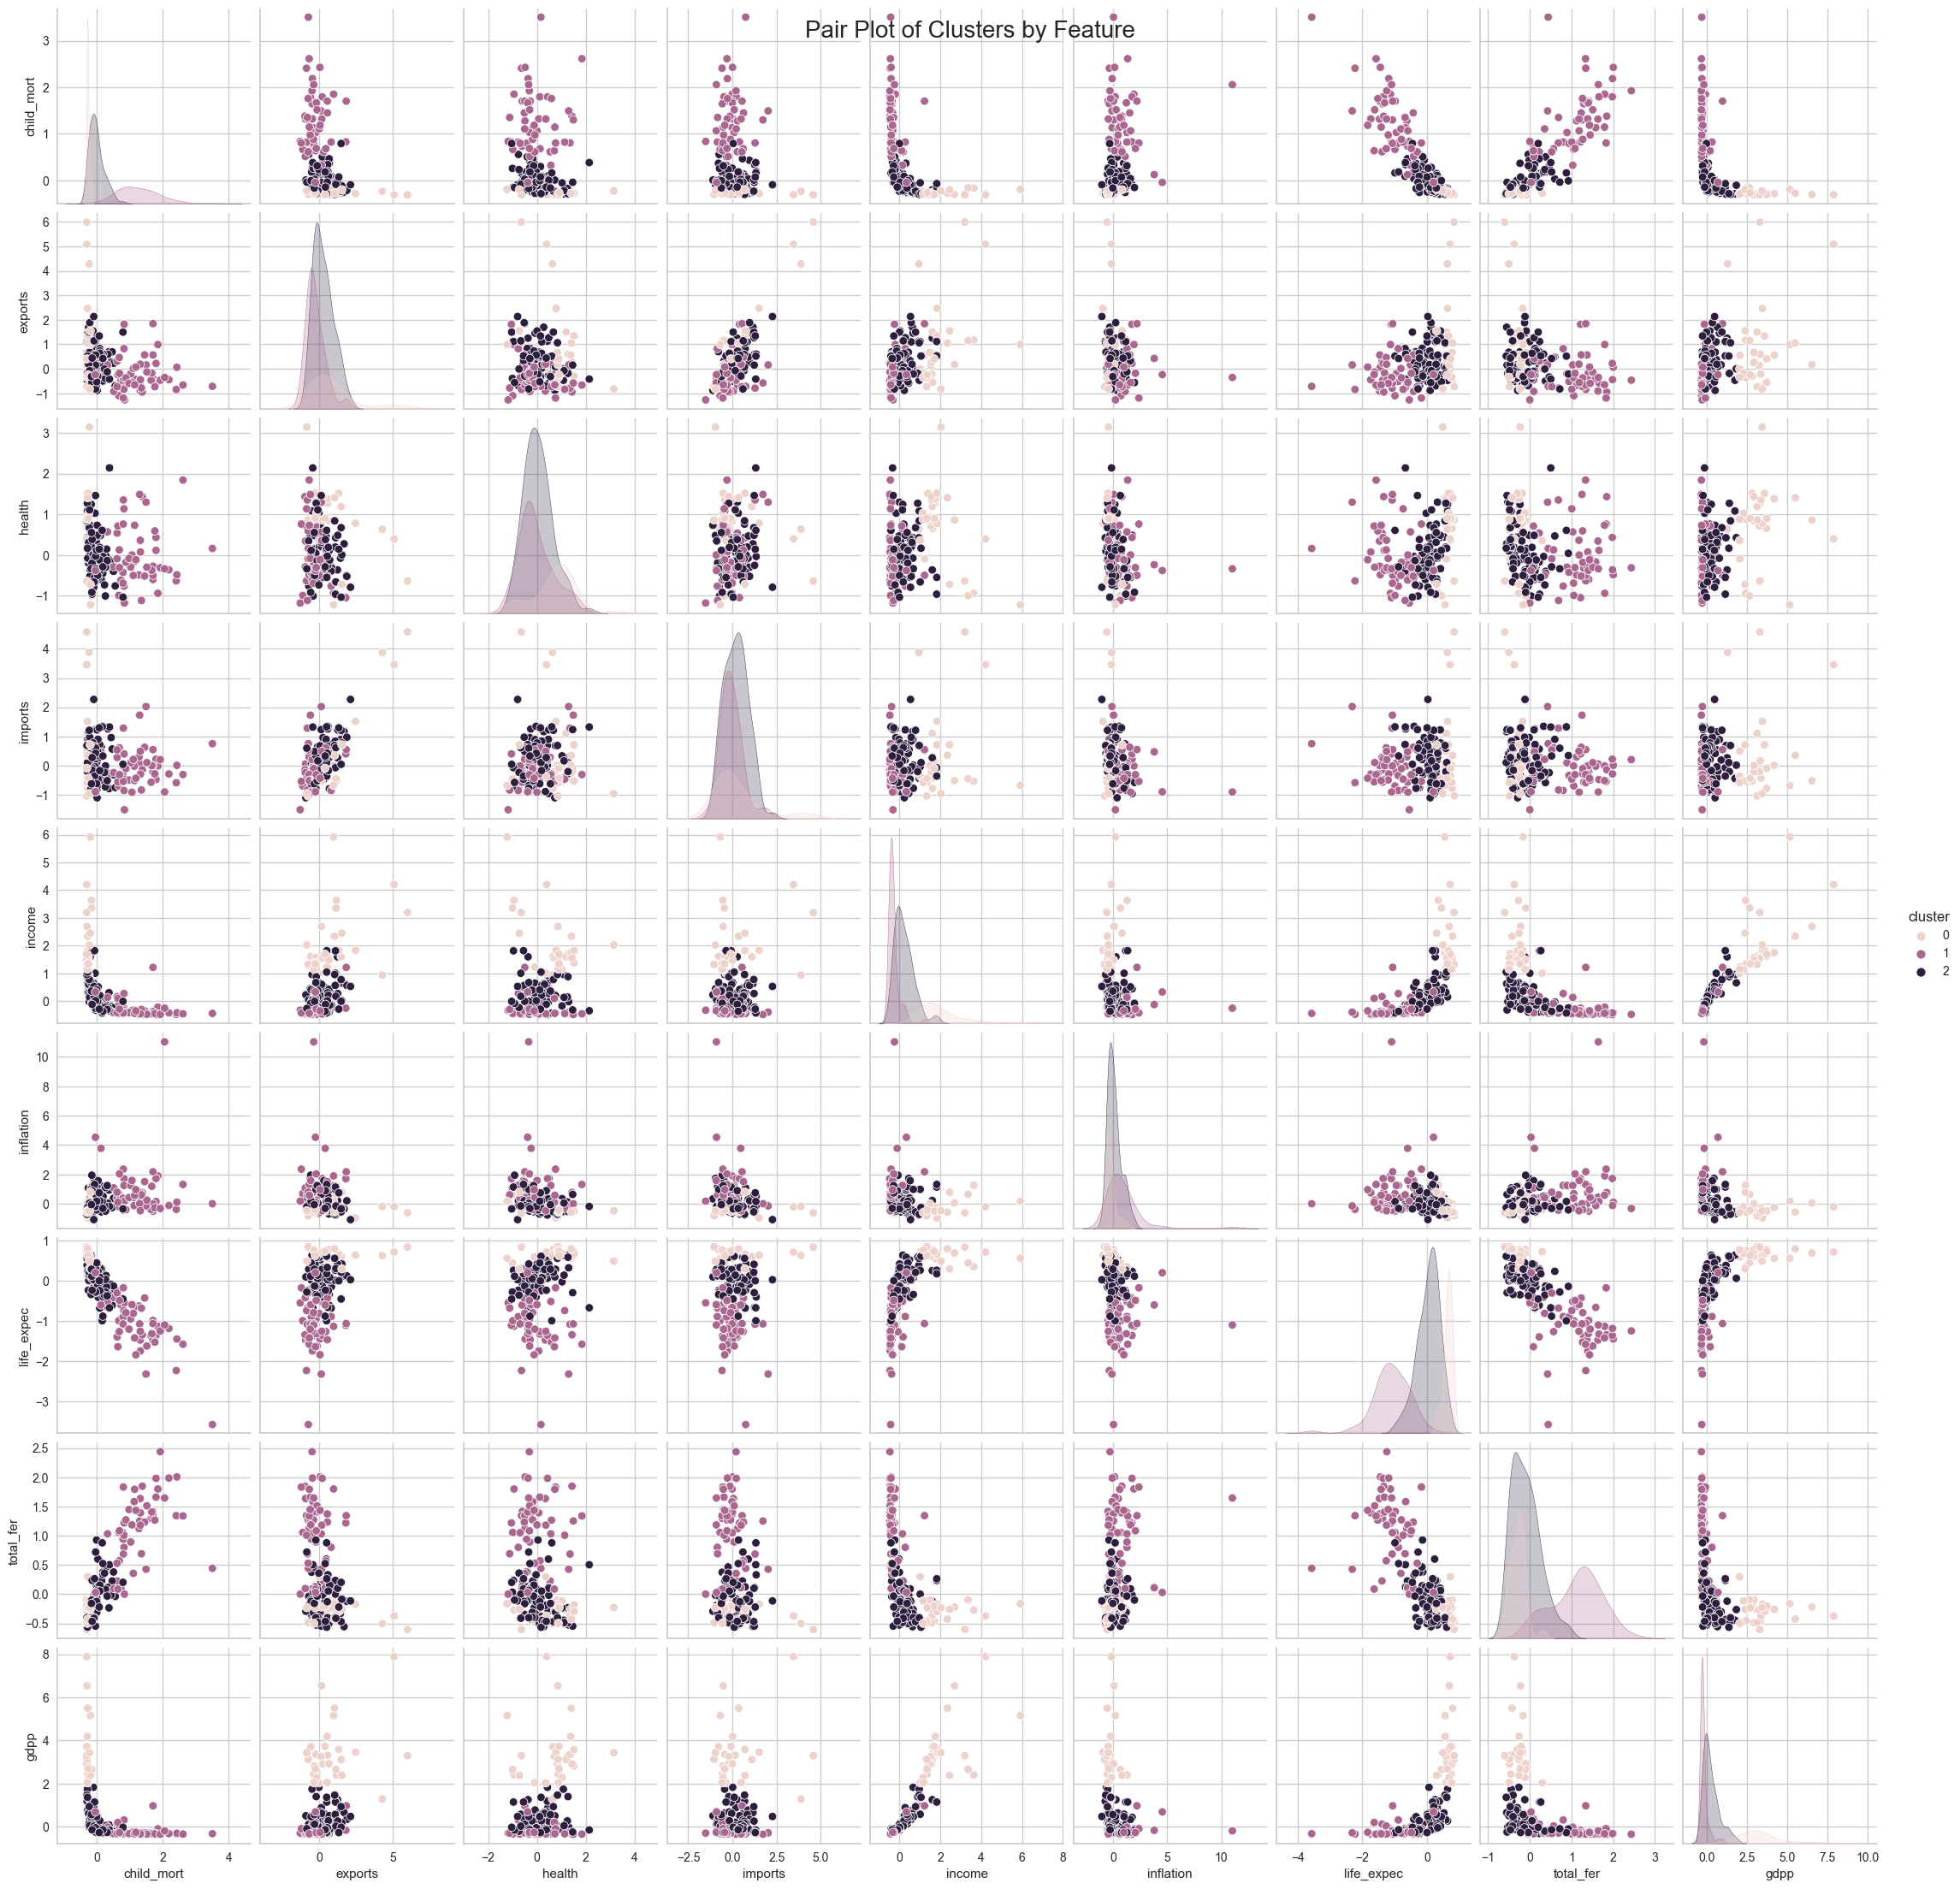

In [39]:
# Dataset: df_robust

# plot
sns.pairplot(df_robust, hue="cluster")

# title
plt.suptitle('Pair Plot of Clusters by Feature', 
             size = 20);

> Depois de rodar o modelo com os dados padronizados (df_robust), observou-se uma sobreposição entre os clusters com pontos de fronteira. Sendo o cluster 2 mais espalhados e o cluster 0 e 1 se sobrepondo.

 * Características dos clusters
 

In [100]:
# Adicionando a coluna cluster ao dataset original, ou seja, com os dados não padronizados.
df1 = df
df1['cluster'] = y_predicted_robust.tolist()
df1

# Uma cópia que será utilizada na clusterização hierarquica
df1_hc = df1
df1_hc

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  cluster  
0         9.44        56.2       5.82    553        1  
1         4.49        76.3       1.65   4090        2  
2        16.10        76.5       2.89   4460        2  
3        22.40        60.1       6.16   3530        1  
4         1.44        76.8       2.13  12200        2  
..         ...         ...        ...    ...      ...  
162       2.62        63.0       3.50   2970        2  
163      45.90        75.4       2.47  13500        1  
164      12.10        73.1       1.95   1310        2  
165      23.60        67.5       4.67   1310        1  
166      14.00        52.0       5.40   1460        1  

[167 rows x 11 columns]

* Visualizando os clusters por feature nos dados originais (não padronizados)

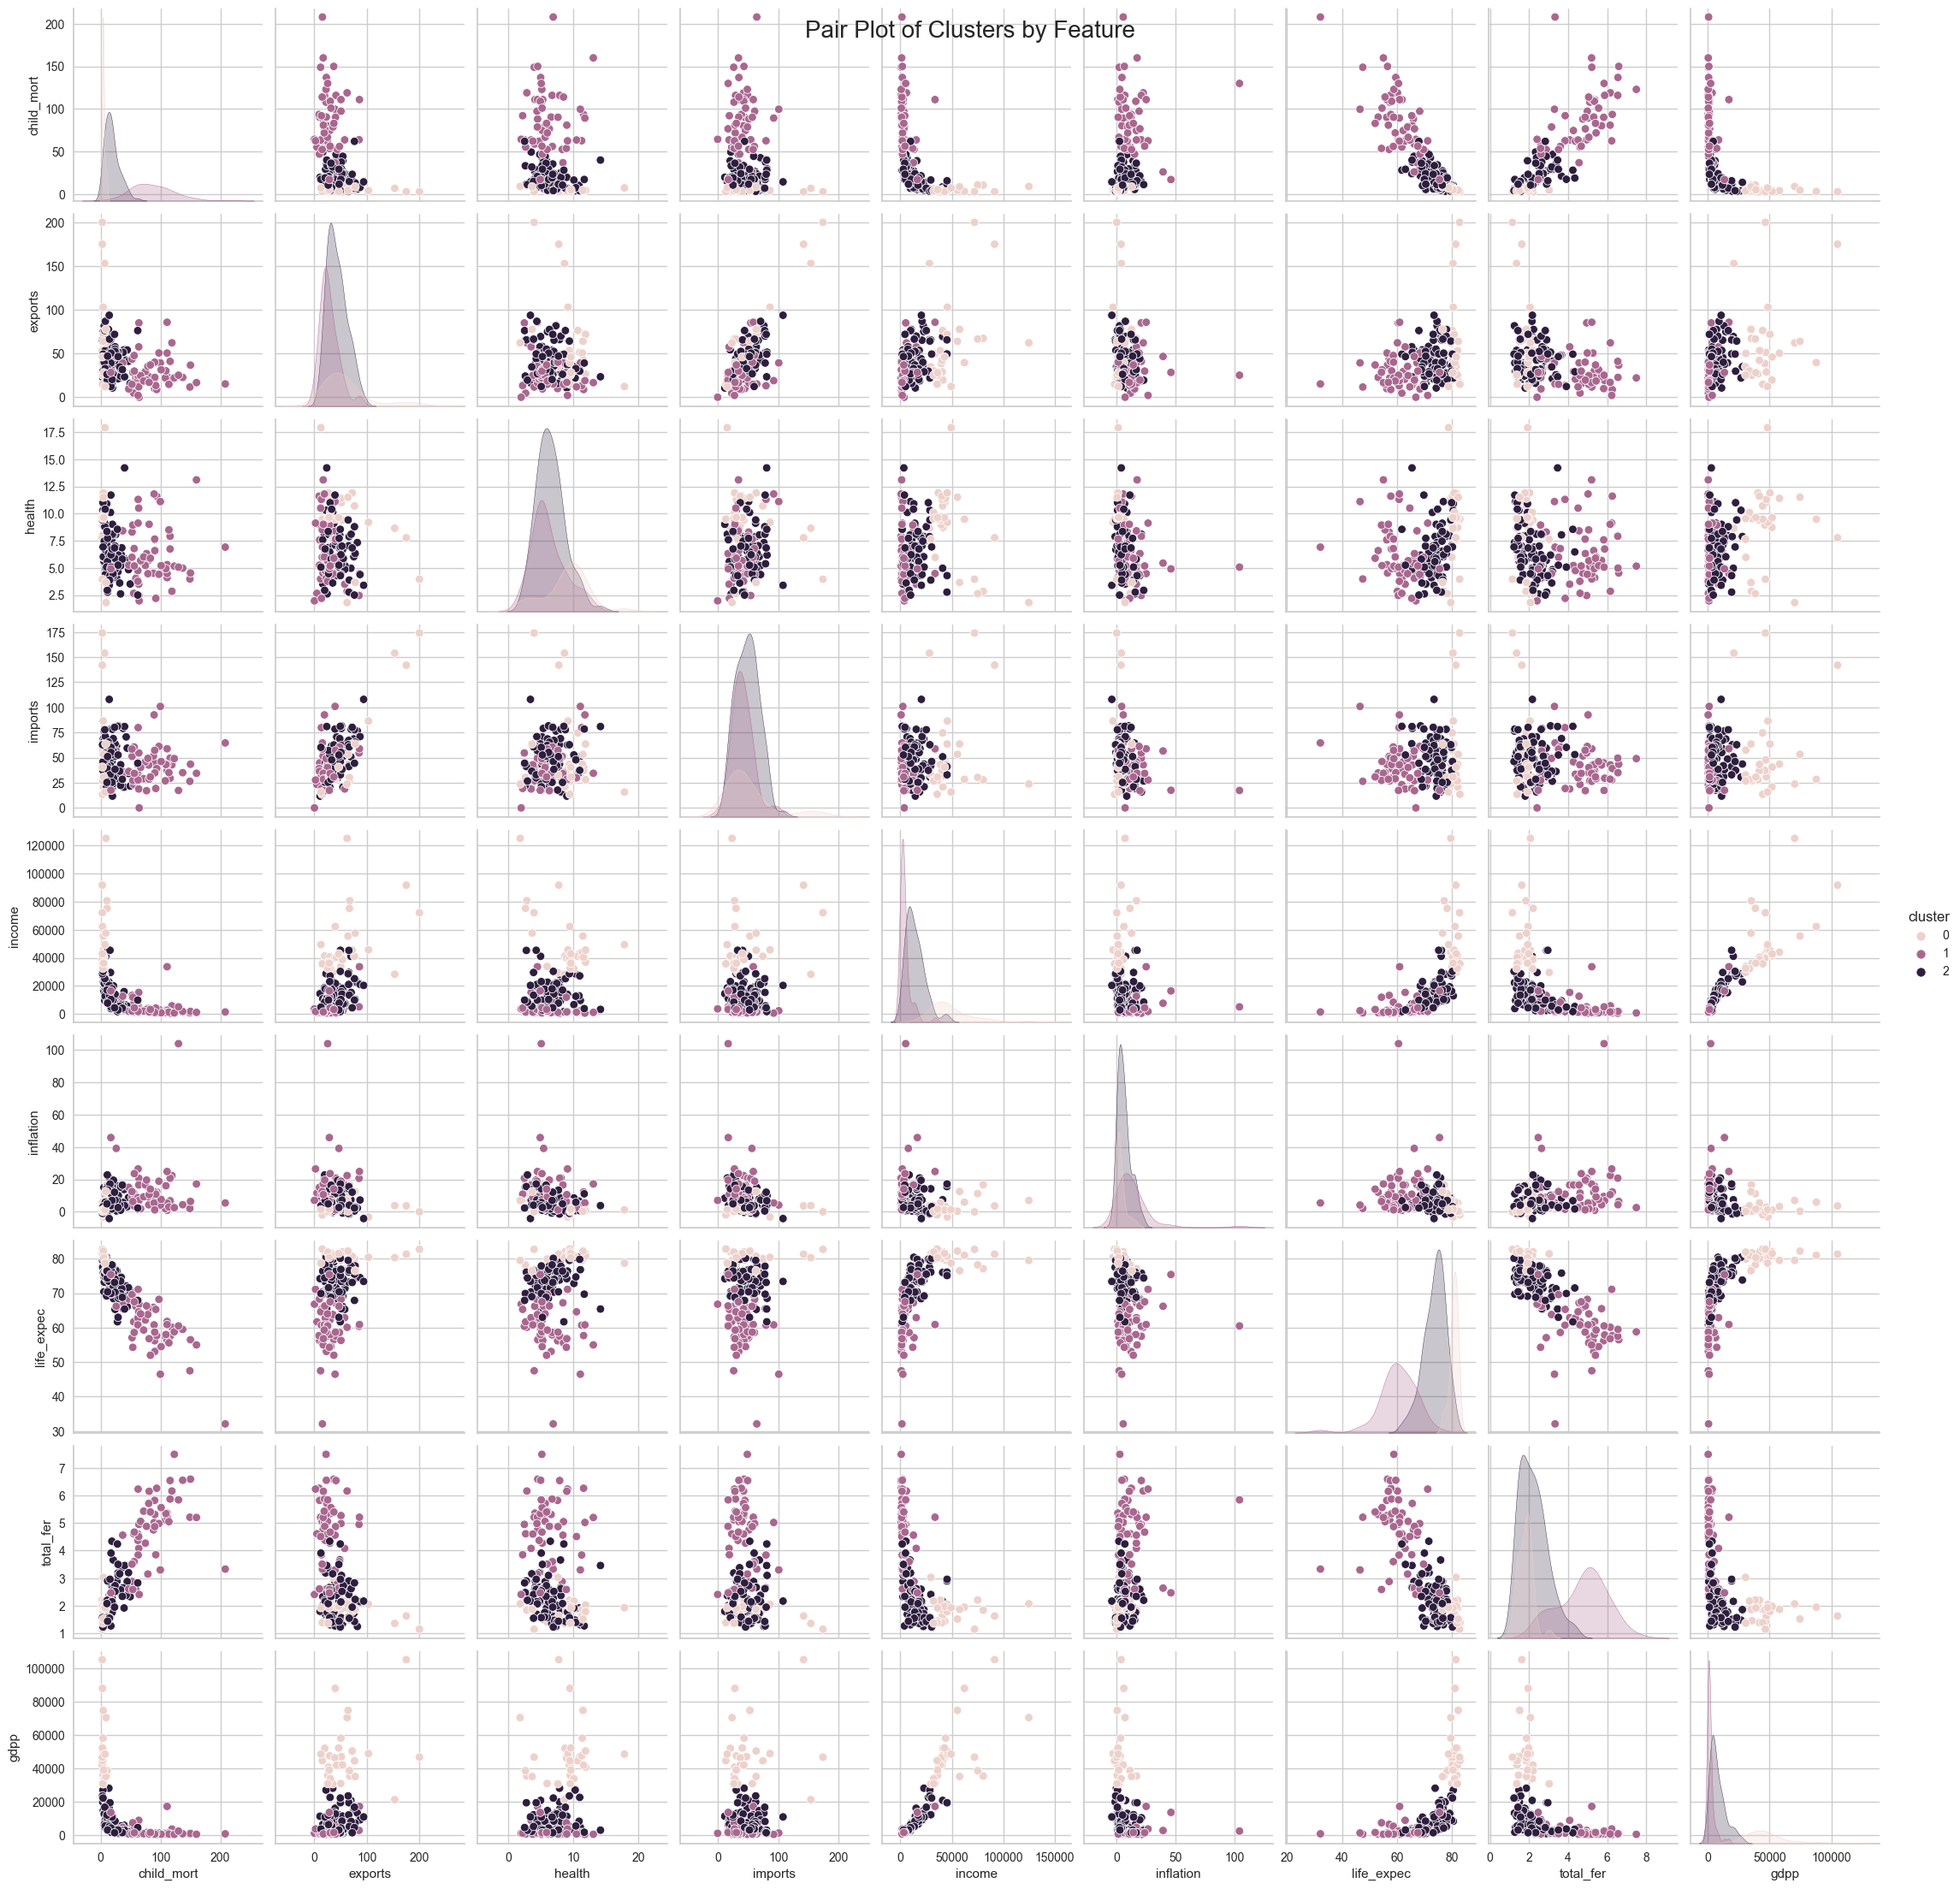

In [41]:
sns.pairplot(df1, hue="cluster")

# title
plt.suptitle('Pair Plot of Clusters by Feature', 
             size = 20);

* Descrição dos clusters

In [42]:
# Tabela de cluster exibindo os valores médios por cluster e por feature.
clusters_table = pd.pivot_table(df1, index=['cluster'])
clusters_table

C:\Users\Winicius\AppData\Local\Temp\ipykernel_7392\125521059.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  clusters_table = pd.pivot_table(df1, index=['cluster'])


child_mort    exports          gdpp    health    imports  \
cluster                                                             
0          5.031034  59.900000  47510.344828  8.889655  51.203448   
1         87.452830  28.160358   2078.679245  6.186038  41.238979   
2         18.943529  42.771765   7965.223529  6.500706  48.942353   

               income  inflation  life_expec  total_fer  
cluster                                                  
0        49468.965517   2.971759   80.544828   1.804483  
1         4183.641509  13.087642   60.269811   4.747547  
2        14198.000000   6.114588   73.561176   2.216000

In [43]:
# cluster 0 
cluster_0 = df1.loc[df1['cluster'] == 0]

# Lista de países no primeiro cluster
cluster_0.country.unique()

array(['Australia', 'Austria', 'Belgium', 'Brunei', 'Canada', 'Cyprus',
       'Denmark', 'Finland', 'France', 'Germany', 'Iceland', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Kuwait', 'Luxembourg', 'Malta',
       'Netherlands', 'New Zealand', 'Norway', 'Qatar', 'Singapore',
       'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates',
       'United Kingdom', 'United States'], dtype=object)

**Cluster 0**: Esse cluster apresenta os melhores dados sócio-econômicos e de saúde. 

In [44]:
# Cluster 1 - Pior grupo
cluster_1 = df1.loc[df1['cluster'] == 1]

# Lista de países no segundo cluster
cluster_1.country.unique()

array(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'India', 'Iraq', 'Kenya',
       'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi',
       'Mali', 'Mauritania', 'Mongolia', 'Mozambique', 'Myanmar',
       'Namibia', 'Nepal', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda',
       'Senegal', 'Sierra Leone', 'South Africa', 'Sudan', 'Tajikistan',
       'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Venezuela', 'Yemen',
       'Zambia'], dtype=object)

In [45]:
# Cluster 2 - Intermediário
cluster_2 = df1.loc[df1['cluster'] == 2]

# Lista de países no segundo cluster
cluster_2.country.unique()

array(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia',
       'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica',
       'Croatia', 'Czech Republic', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Greece',
       'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'Indonesia', 'Iran',
       'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia',
       'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malaysia',
       'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova',
       'Montenegro', 'Morocco', 'Oman', 'Panama', 'Paraguay', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Samoa',
       'Saudi Arabia', 'Serbia', 'Seychelles', 'Slovak Republic',
       'Slovenia', 'Solomon Islands', 'Sou

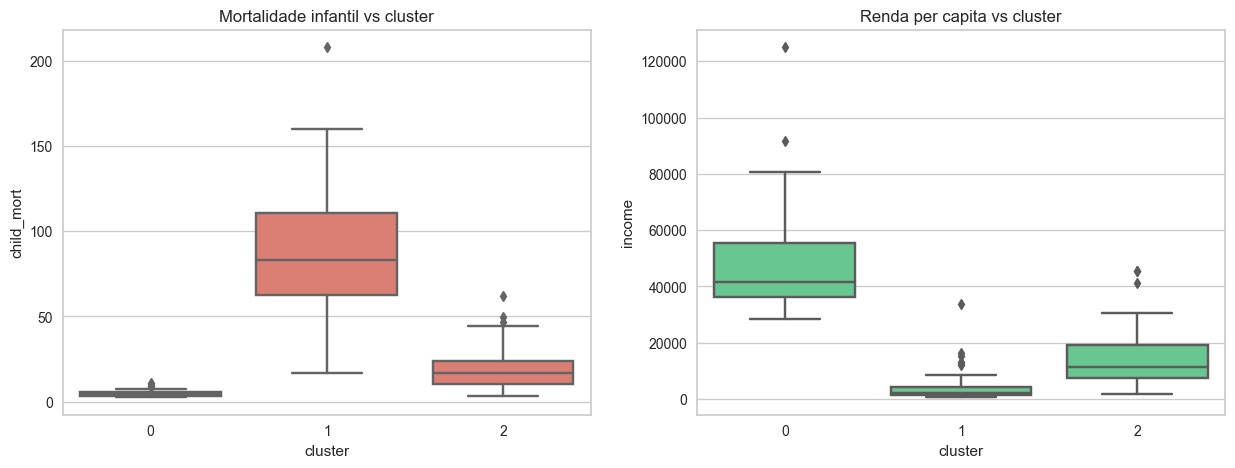

In [46]:
# MORTALIDADE INFANTIL E RENDA PER CAPITA.

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'cluster', y = 'child_mort', data  = df1, color = '#EC7063');
plt.title('Mortalidade infantil vs cluster')

plt.subplot(1,2,2)
sns.boxplot(x = 'cluster', y = 'income', data  = df1, color = '#58D68D');
plt.title('Renda per capita vs cluster')

plt.show()

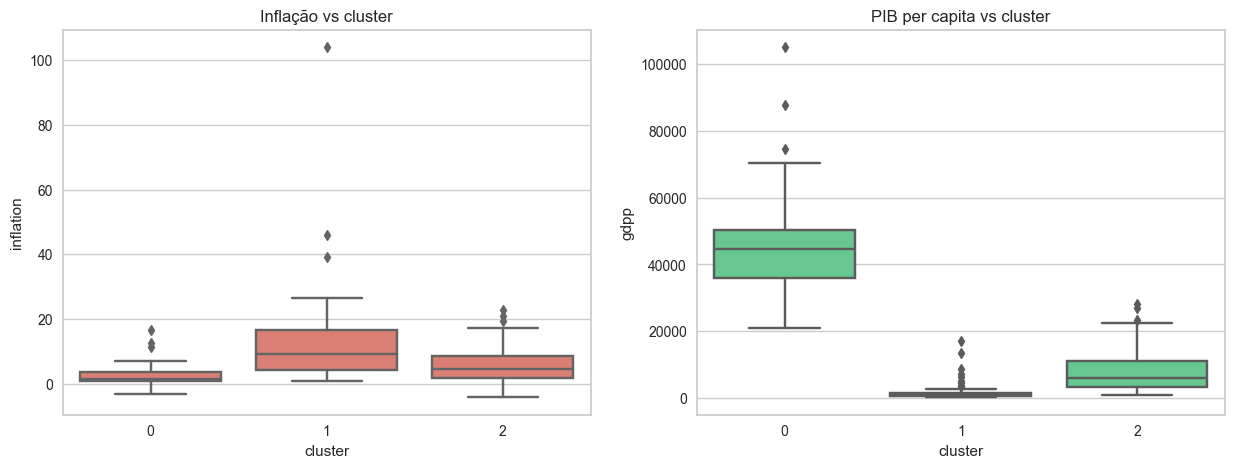

In [47]:
# INFLAÇÃO E PIB PER CAPITA.

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'cluster', y = 'inflation', data  = df1, color = '#EC7063');
plt.title('Inflação vs cluster')


plt.subplot(1,2,2)
sns.boxplot(x = 'cluster', y = 'gdpp', data  = df1, color = '#58D68D');
plt.title('PIB per capita vs cluster')

plt.show()

In [85]:
df1['cluster'].loc[df1['cluster'] == 0] = 'Nenhuma ajuda é necessária'
df1['cluster'].loc[df1['cluster'] == 1] = 'Países que mais precisam de ajuda'
df1['cluster'].loc[df1['cluster'] == 2] = 'Países que podem ou não necessitar de ajuda'

fig = px.choropleth(df1[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Quais países devem receber financiamento?',
                    color = df1['cluster'],  
                    color_discrete_map = {'Países que mais precisam de ajuda':'Red',
                                        'Nenhuma ajuda é necessária':'Green',
                                        'Países que podem ou não necessitar de ajuda':'Yellow'}
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

C:\Users\Winicius\AppData\Local\Temp\ipykernel_7392\413421691.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Conclusões - KMeans

- Os países do cluster 0 - caracterizados por uma alta taca de expectativa de vida, baixa mortalidade infantil, as menores taxas de inflação, maior renda per capita, entrte outros fatores socioeconômicos positivos - estão localizados, principalmente, na América do Norte, Oceania e alguns países escandinavos, tais como Dinamarca, Finlândia, Islândia, Noruega e Suécia. São os países ditos desenvolvidos.


- O segundo grupo, cluster 1, são os países que mais necessitam de algum tipo de auxílio em diversas áreas. Estes se localizam, principalmente, no continente africano, parte da Ásia e uma parte menor da América do Sul.


- Por fim, o cluster 2, é composto por países intermediários, os países emergentes, como Brasil, Rússia, China, entre outros. 


- As regiões não coloridas são de países sem informação disponível.


- Conseguimos identificar alguns padrões nos dados e agrupar os países em 3 grupos. No entanto, não devemos confiar apenas neste resultado para fazer a recomendação de países que devem receber financiamento. 


- A implementação de um modelo de clustering, neste caso, não trouxe padrões que poderíamos não ter encontrado de outra forma, mas, apenas confirmou o conhecimento geral da intuição sobre o tema.


---

* PCA Data

In [ ]:
# CURVA DO COTOVELO

sse = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df2_pca)
    sse.append(km.inertia_)
    
# plot
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
# Calculate Silhoutte Score - stardardised + PCA
score = silhouette_score(df2_pca, km.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

> Aplicando o método para os dados padronizados e reduzidos a 04 componentes principais, temos uma conclusão parecida. É posível observar que a partir do número de três clusters, as distâncias dos erros quadráticos praticamente se estabiliza. Neste ponto que seria o “cotovelo”, ou seja, a partir desse ponto não existe uma discrepância tão significativa em termos de variância.

* Decisão: k=3

In [53]:
df2_pca = pd.read_pickle('data/df2_pca.pickle')

child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer   gdpp  cluster  
0         5.82    553        1  
1         1.65   4090        2  
2         2.89   4460        2  
3         6.16   3530        1  
4         2.13  12200        2  
..         ...    ...      ...  
162       3.50   2970        2  
163       2.47  13500        1  
164       1.95   1310        2  
165       4.67   1310        1  
166       5.40   1460        1  

[167 rows x 10 columns]

In [54]:
# KMEANS CLUSTERING 

km = KMeans(
    n_clusters = 3,  # numero de clusters/centroids
    init = 'random', # ‘random’: escolha n_clusters observações (linhas) aleatoriamente dos dados para os centróides iniciais
    n_init = 10,     # Este é o número de vezes que o algoritmo k-means será executado com diferentes sementes de centroides
    max_iter = 300,  # Este é o número máximo de iterações do algoritmo k-means para uma única execução.
    tol = 1e-4,      # Default.
    random_state = 0 # Determina a geração de números aleatórios para inicialização do centroide. Use um int para tornar a aleatoriedade determinística
)

# method to compute the clusters and assign the labels
y_predicted_PCA = km.fit_predict(df2) 

df2['cluster'] = y_predicted_PCA
df2.head()

print('Inercia de',round(km.inertia_,0))

Inercia de 616.0


In [55]:
# add cluster column to original dataset with countries and non-scaled values
data = df
data['cluster'] = y_predicted_PCA.tolist()

clusters_table = pd.pivot_table(data, index=['cluster'])
clusters_table

C:\Users\Winicius\AppData\Local\Temp\ipykernel_7392\305786829.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  clusters_table = pd.pivot_table(data, index=['cluster'])


child_mort    exports          gdpp    health    imports  \
cluster                                                             
0          5.031034  59.900000  47510.344828  8.889655  51.203448   
1         87.452830  28.160358   2078.679245  6.186038  41.238979   
2         18.943529  42.771765   7965.223529  6.500706  48.942353   

               income  inflation  life_expec  total_fer  
cluster                                                  
0        49468.965517   2.971759   80.544828   1.804483  
1         4183.641509  13.087642   60.269811   4.747547  
2        14198.000000   6.114588   73.561176   2.216000

In [56]:
# cluster 0 - Intermediário
cluster_0 = data.loc[data['cluster'] == 0]

# list of countries in this country
cluster_0.country.unique()

array(['Australia', 'Austria', 'Belgium', 'Brunei', 'Canada', 'Cyprus',
       'Denmark', 'Finland', 'France', 'Germany', 'Iceland', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Kuwait', 'Luxembourg', 'Malta',
       'Netherlands', 'New Zealand', 'Norway', 'Qatar', 'Singapore',
       'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates',
       'United Kingdom', 'United States'], dtype=object)

In [57]:
# cluster 1 - Grupo de países mais necessitados de ajuda!
cluster_1 = data.loc[data['cluster'] == 1]

# list of countries in this country
cluster_1.country.unique()

array(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'India', 'Iraq', 'Kenya',
       'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi',
       'Mali', 'Mauritania', 'Mongolia', 'Mozambique', 'Myanmar',
       'Namibia', 'Nepal', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda',
       'Senegal', 'Sierra Leone', 'South Africa', 'Sudan', 'Tajikistan',
       'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Venezuela', 'Yemen',
       'Zambia'], dtype=object)

In [58]:
# cluster 2 - Países mais ricos!
cluster_2 = data.loc[data['cluster'] == 2]

# list of countries in this country
cluster_2.country.unique()

array(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia',
       'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica',
       'Croatia', 'Czech Republic', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Greece',
       'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'Indonesia', 'Iran',
       'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia',
       'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malaysia',
       'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova',
       'Montenegro', 'Morocco', 'Oman', 'Panama', 'Paraguay', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Samoa',
       'Saudi Arabia', 'Serbia', 'Seychelles', 'Slovak Republic',
       'Slovenia', 'Solomon Islands', 'Sou

In [59]:
data['cluster'].loc[data['cluster'] == 0] = 'Países que podem ou não necessitar de ajuda'
data['cluster'].loc[data['cluster'] == 1] = 'Países que mais precisam de ajuda'
data['cluster'].loc[data['cluster'] == 2] = 'Nenhuma ajuda é necessária'

fig = px.choropleth(data[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Quais países devem receber financiamento?',
                    color = data['cluster'],  
                    color_discrete_map = {'Países que mais precisam de ajuda':'Red',
                                        'Nenhuma ajuda é necessária':'Green',
                                        'Países que podem ou não necessitar de ajuda':'Yellow'}
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels', legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

C:\Users\Winicius\AppData\Local\Temp\ipykernel_7392\2702485018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'].loc[data['cluster'] == 0] = 'Países que podem ou não necessitar de ajuda'


> A utilização do PCA como alternativa não resultou em diferença significativa.

## Clusterização Hierárquica

**Clusterização Hierárquica** é um algoritmo baseado em distância que é usado para problemas de aprendizado não supervisionado.

* Ele desenvolve a hierarquia de clusters na forma de uma árvore, ou seja, conhecido como dendrograma. Para este problema, vamos usar Agglomerative Clustering, que é uma abordagem de baixo para cima que considera todos os pontos como clusters e os mescla com base em suas distâncias das seguintes maneiras:

    1. Inicialmente todos os pontos são considerados como clusters.
    
    2. Então, clusters que estão mais próximos começam a se fundir como um novo cluster.
    
    3. Esse cluster combinado é comparado com outros clusters e o cluster mais próximo é mesclado.
    
    4. Esse processo continua até que um único grande cluster seja formado.
    
    
* Este processo de formação de clusters pode então ser visualizado com um dendrograma. A partir dele, selecionamos o número de clusters identificando o número de merges presentes no penúltimo estágio. Mais é o comprimento das linhas verticais, maior a distância entre os grupos.


* Para selecionar o número de clusters, definimos um valor limite e contamos o número de linhas verticais presentes acima dele. Este número de linhas verticais forma o número de clusters. Outros métodos, como o método Silhouette Score e o método Elbow, também podem ser usados.


* Para **Agglomerative Clustering**, tem 2 hiperparâmetros importantes:

    * linkage: Existem vários métodos de conexão ou vinculação para cluster, ou seja, Single, Centroid, Average , etc.
    * affinity: É a fórmula de distância que compara a distância antes de mesclar os clusters.

In [119]:
m1 = df1_hc.drop(columns = ['country']).values
m1

array([[9.02e+01, 1.00e+01, 7.58e+00, ..., 5.82e+00, 5.53e+02, 1.00e+00],
       [1.66e+01, 2.80e+01, 6.55e+00, ..., 1.65e+00, 4.09e+03, 2.00e+00],
       [2.73e+01, 3.84e+01, 4.17e+00, ..., 2.89e+00, 4.46e+03, 2.00e+00],
       ...,
       [2.33e+01, 7.20e+01, 6.84e+00, ..., 1.95e+00, 1.31e+03, 2.00e+00],
       [5.63e+01, 3.00e+01, 5.18e+00, ..., 4.67e+00, 1.31e+03, 1.00e+00],
       [8.31e+01, 3.70e+01, 5.89e+00, ..., 5.40e+00, 1.46e+03, 1.00e+00]])

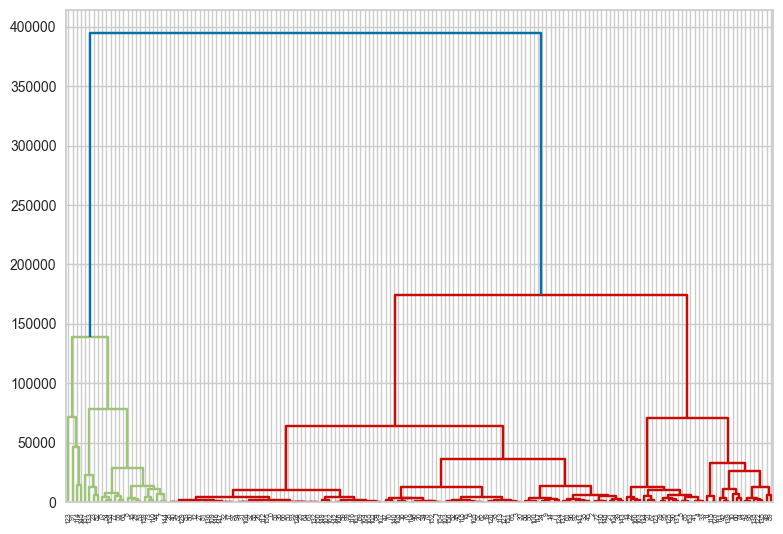

In [120]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_data = linkage(m1, method = 'ward', metric = 'euclidean')
dendrogram(linkage_data)
plt.tight_layout()
plt.show()

In [121]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
labels = hierarchical_cluster.fit(m1)

pred_agc = pd.Series(hierarchical_cluster.labels_)
df['cluster'] = pred_agc; df1_hc['cluster'] = pred_agc

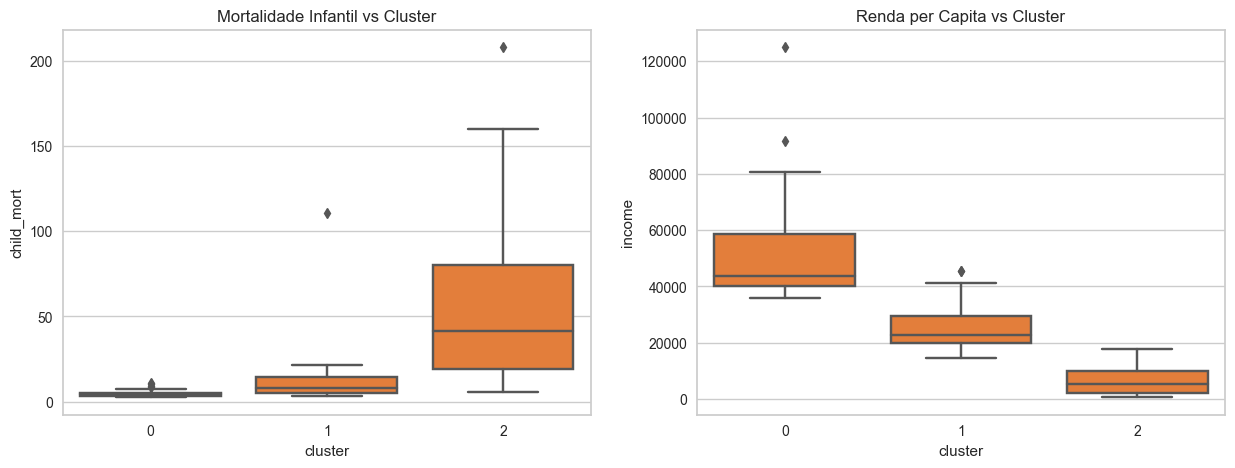

In [123]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'cluster', y = 'child_mort', data  = df1, color = '#FF781F');
plt.title('Mortalidade Infantil vs Cluster')

plt.subplot(1,2,2)
sns.boxplot(x = 'cluster', y = 'income', data  = df1, color = '#FF781F');
plt.title('Renda per Capita vs Cluster')

plt.show()

In [124]:
df1_hc['cluster'].loc[df1_hc['cluster'] == 0] = 'Nenhuma ajuda é necessária'
df1_hc['cluster'].loc[df1_hc['cluster'] == 1] = 'Países que podem ou não necessitar de ajuda'
df1_hc['cluster'].loc[df1_hc['cluster'] == 2] = 'Países que mais precisam de ajuda'

C:\Users\Winicius\AppData\Local\Temp\ipykernel_7392\4103289908.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [125]:
df1_hc

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  \
0         9.44        56.2       5.82    553   
1         4.49        76.3       1.65   4090   
2        16.10        76.5       2.89   4460   
3        22.40        60.1       6.16   3530   
4         1.44        76.8       2.13  12200   
..         ...         ...        ...    ...   
162       2.62        63.0       3.50   2970   
163      45.90        75.4       2.47  13500   
164      12.10        73.1       1.95   1310   
165      23.60        67.5       4.67   1310   
166      14.00        52.0       5.40   1460   

                                         cluster  
0              Países que mais precisam de ajuda  
1              Países que mais precisam de ajuda  
2              Países que mais precisam de ajuda  
3              Países que mais precisam de ajuda  
4    Países que podem ou não necessitar de ajuda  
..                                           ...  
162            Países que mais precisam de ajuda  
163  Países que podem ou não necessitar de ajuda  
164            Países que mais precisam de ajuda  
165            Países que mais precisam de ajuda  
166            Países que mais precisam de ajuda  

[167 rows x 11 columns]

In [126]:
fig = px.choropleth(df1_hc[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Quais países mais necessitam de ajuda?',
                    color = df1_hc['cluster'],  
                    color_discrete_map = {'Países que mais precisam de ajuda':'Red',
                                        'Nenhuma ajuda é necessária':'Green',
                                        'Países que podem ou não necessitar de ajuda':'Yellow'}
                   )
# fig
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels', legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

## Conclusão

* Comparando o desempenho dos modelos de clusterização aplicados, mais especificamente, K-Means e a Clusterização Hierárquica, pode-se observar algumas diferenças fundamentais. 


* Em ambos os modelos conseguimos identificar alguns padrões de similaridade e agrupar os países em 3 diferentes grupos. Porém, ainda precisamos de cuidado antes de decidir, de forma definitiva, como alocar tais recursos.


* Conforme observado anteriormente, a implementação de modelos de clusterização não trouxe padrões que não poderíamos ter encontrado de outra forma, mas, apenas confirmou a intuição sobre o tema.


* No entanto, o modelo de clusterização hierárquica foi capaz de identificar um número maior de países em situações de risco. A meu ver, de forma mais assertiva. Países, como a Venezula, que não haviam sido classificados pelo KMeans no grupo de países comk índices mais baixos de desevolvimento humano, em geral, foram identificados pela clusterização hierárquica.


* Em resumo, os modelos utilizados são fundamentalmente diferentes. Eles são baseados em princípios diferentes, mostrando assim a diferença nos desempenhos do modelo. No geral, os desempenhos do modelo não são tão bons.


* Outros métodos podem ser aplicados, tais como DBSCAN, no sentido de dar prosseguimento ao estudo iniciado nesse notebook. De modo geral, o desempenho de um modelo é resultado da qualidade dos dados, bem como das etapas de pré-processamento e de feature engineering. Essa última, pode ser melhor explorada em novos estudos sobre o tema.


In [118]:
# Exportando os dados
# df_robust.to_pickle('data/df_robust.pickle')
# df2_pca.to_pickle('data/df2_pca.pickle')
# df.to_pickle('data/df.pickle')
# df1.to_pickle('data/df1.pickle')
# df1_hc.to_pickle('data/df1_hc.pickle')

# Retomando daqui...
# df_robust = pd.read_pickle('data/df_robust.pickle')
# df2_pca = pd.read_pickle('data/df2_pca.pickle')
# df = pd.read_pickle('data/df.pickle')
# df1 = pd.read_pickle('data/df1.pickle')
# df1_hc = pd.read_pickle('data/df1_hc.pickle')

# print(df_robust["cluster"].unique())
# print(df2_pca["cluster"].unique())